In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/logistic-reg-visual/Social_Network_Ads.csv


# Introduction

Lately, I have been struggling for a while to visualize the generated model of a classification model. I relied only on the classification report and the confusion matrix to weigh the model performance.
However, visualize the results of the classification has its charm and makes more sense of it. So, I built a decision surface, and when I succeeded, I decided to write about it as a learning process and for anyone who might have stuck on the same issue.

# Tutorial content
In this tutorial, I will start with the built-in dataset package within the Sklearn library to focus on the implementation steps. After that, I will use pre-processed data (without missing data or outliers) to plot the decision surface after applying the standard scaler.

* Decision Surface
* Importing important libraries
* Dataset generation
* Generating decision surface
* Applying for real data

# Decision Surface

Classification in machine learning means to train your data to assign labels to the input examples.
Each input feature is defining an axis on a feature space. A plane is characterized by a minimum of two input features, with dots representing input coordinates in the input space. If there were three input variables, the feature space would be a three-dimensional volume.
The ultimate goal of classification is to separate the feature space so that labels are assigned to points in the feature space as correctly as possible.
This method is called a decision surface or decision boundary, and it works as a demonstrative tool for explaining a model on a classification predictive modeling task. We can create a decision surface for each pair of input features if you have more than two input features.

# Importing important libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split


# Generate dataset

I will use the `make_blobs()`function within the datasets class from the Sklearn library to generate a custom dataset. Doing so would focus on the implementations rather than cleaning the data. However, the steps are the same and are a typical pattern.
Let's start by defining the dataset variables with 1000 samples and only two features and a standard deviation of 3 for simplicity's sake.

In [3]:
X, y = datasets.make_blobs(n_samples = 1000, centers = 2, n_features = 2, random_state = 1, cluster_std = 3)

Once the dataset is generated, hence we can plot a scatter plot to see the variability between variables.

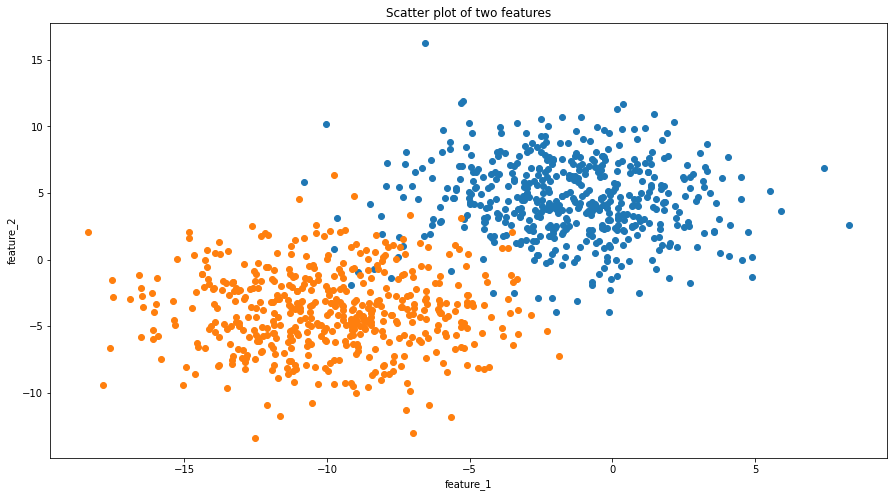

In [4]:
# create scatter plot for samples from each class
plt.figure(figsize=(15, 8))

for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
plt.title('Scatter plot of two features')
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.show()

Here we looped over the dataset and plotted points between each Xand y colored by a class label. In the next step, we need to build a predictive classification model to predict the class of unseen points. A logistic regression could be used in this case since we have only two categories.

In [5]:
regressor = LogisticRegression()

In [6]:
# fit the regressor into X and y
regressor.fit(X, y)

LogisticRegression()

In [7]:
# apply the predict method 
y_pred = regressor.predict(X)

All `y_pred` could be evaluated using the `accuracy_score` class from `sklearn`

In [8]:
accuracy = accuracy_score(y, y_pred)
print('Accuracy: %.3f' % accuracy)

Accuracy: 0.972


# Generating decision surface

`matplotlib` provides a handy function called `contour()`, which can insert the colors between points. However, as the documentation suggested, we need to define the grid of points `X` of `y` in the feature space. The steps would be to find the maximum value and minimum value of each feature then increase by one to make sure that the whole space is covered.

In [9]:
min1, max1 = X[:, 0].min() - 1, X[:, 0].max() + 1 #1st feature
min2, max2 = X[:, 1].min() - 1, X[:, 1].max() + 1 #2nd feature

Then we can define the cordinates scale using the `arange()` function from the `numpy` library with a`0.01` resolution to get the scale.

In [10]:
x1_scale = np.arange(min1, max1, 0.1)
x2_scale = np.arange(min2, max2, 0.1)


The next step is to convert `x1_scale` and `x2_scale` into a grid. The function `meshgrid()` within the `numpy` library is what we need.

In [11]:
x_grid, y_grid = np.meshgrid(x1_scale, x2_scale)

If we take a look at the generated `x_grid`, you will find that it is an array of array. So to be able to use it, we need to flatten it using the `flatten()` method from `numpy` library

In [12]:
# flatten each grid to a vector
x_g, y_g = x_grid.flatten(), y_grid.flatten()
x_g, y_g = x_g.reshape((len(x_g), 1)), y_g.reshape((len(y_g), 1))


Finally, stacking the vectors side by side as columns in an input dataset, e.g. like our original training dataset, but at a much higher resolution.

In [13]:
grid = np.hstack((x_g, y_g))


Now, we can fit into the model to predict values.

In [14]:
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# make predictions for the grid
y_pred_2 = model.predict(grid)
p_pred = model.predict_proba(grid)
# keep just the probabilities for class 0
p_pred = p_pred[:, 0]

In [15]:
p_pred.shape
pp_grid = p_pred.reshape(x_grid.shape)

Now, a grid of values and the predicted class label across the feature space has been generated. 
Subsequently, we will plot those grids as a contour plot using `contourf()`. 
The `contourf()`function needs separate grids per axis. To achieve that, we can utilize the `x_grid` and `y_grid` and reshape the predictions `(y_pred)` to have the same shape.

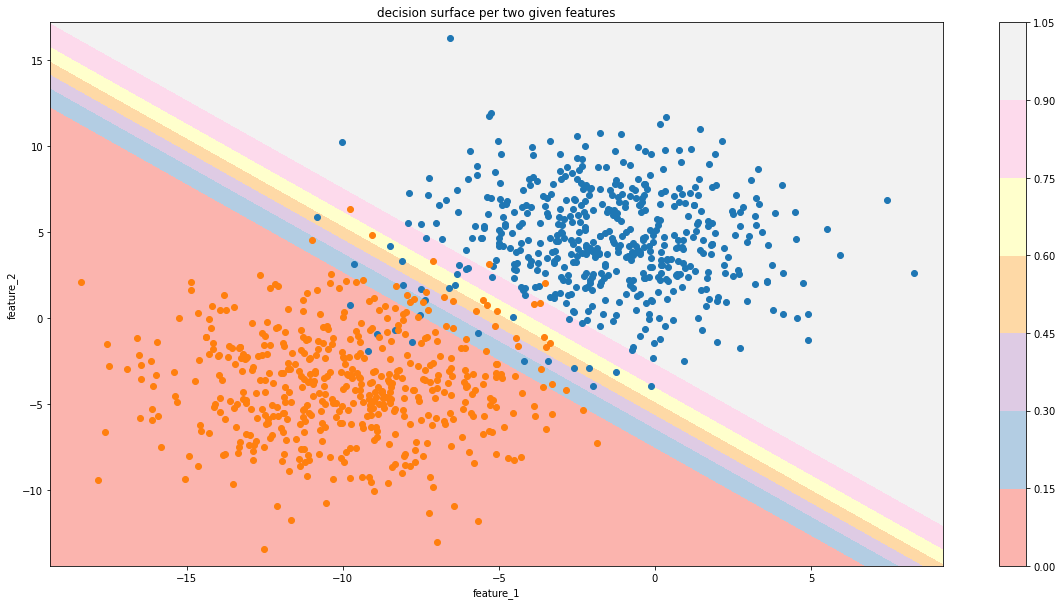

In [16]:

plt.figure(figsize=(20,10))
# plot the grid of x, y and z values as a surface
surface = plt.contourf(x_grid, y_grid, pp_grid, cmap='Pastel1')
plt.colorbar(surface)
# create scatter plot for samples from each class
for class_value in range(2):
# get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Pastel1')
# show the plot
plt.title('decision surface per two given features')
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.show()

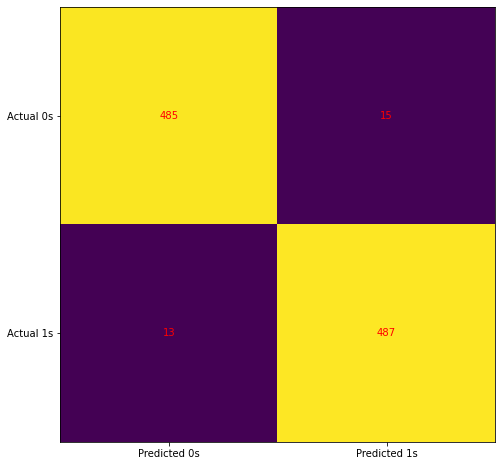

In [17]:

cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.rcParams["font.size"] = "20"
plt.show()

# Apply to real data

Now it is time to apply the previous steps to a real data to connect everything with each other. As I mentioned earlier, this dataset is already cleaned with no missing points. The dataset is representing car purchase history for a sample of people according to their age and salary per year. 

# Importing the dataset

In [18]:
dataset = pd.read_csv('../input/logistic-reg-visual/Social_Network_Ads.csv')

In [19]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


The dataset has two features `Age` and `EstimatedSalary` and one dependent variable `purshased` as a binary column. Value `0` represents the person with corresponding age and salary didn't make a car purchase. However, `1` means that the person did make a purchase of the car.

The next step would be to seperate dependent variable from features as `X` and `y` 

In [20]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature scaling

We need this step because `Age` and `salary` is not on the same scale

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Logistic Regression model on the Training set

In [23]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Predicting a new result

In [24]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


It gave a result of category `0` means that the model predicts that a person with age of `30` years with a salary of `87000` won't purchase the car.

# Predicting the Test set results

In [25]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix

In [26]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[65  3]
 [ 8 24]]


0.89

# Visualising the results
## 1. Confusion matrix

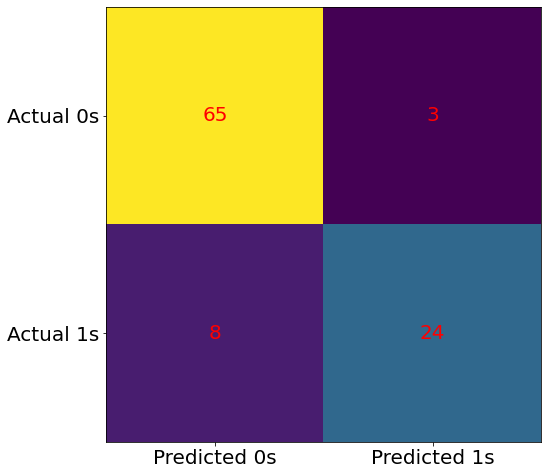

In [27]:

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.rcParams["font.size"] = "30"
plt.show()

## 2. decision surface - training results

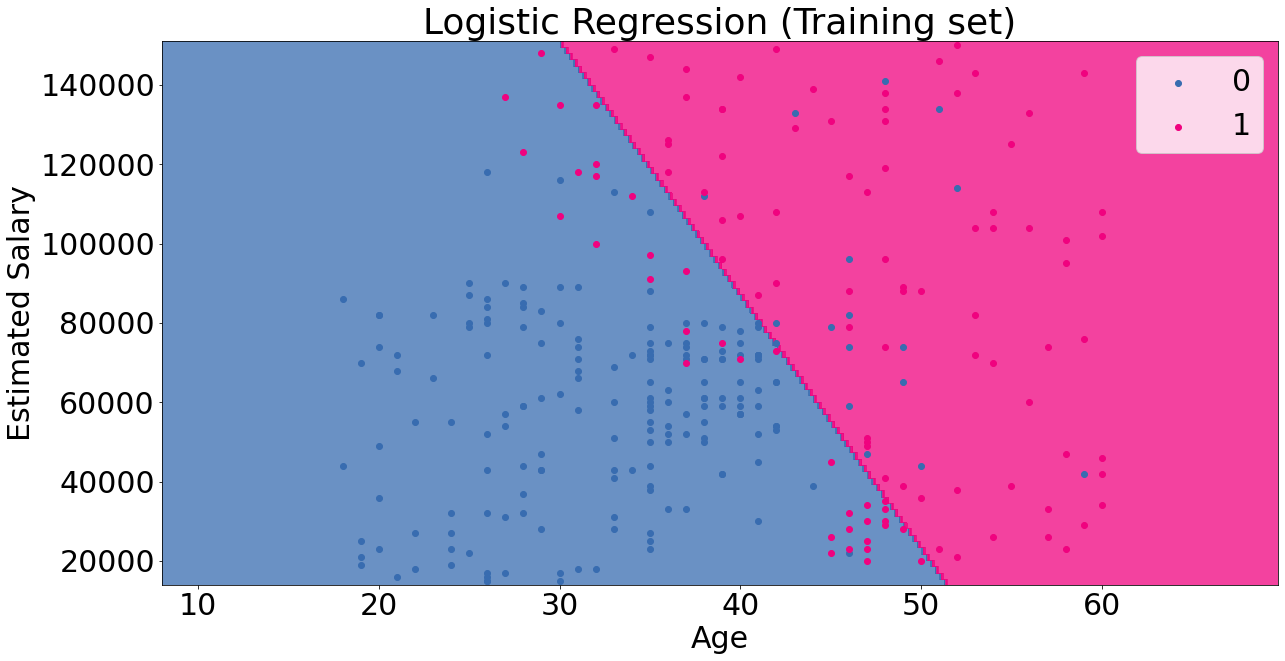

In [28]:

#1. reverse the standard scaler on the X_train
X_set, y_set = sc.inverse_transform(X_train), y_train

#2. Generate decision surface boundaries
min1, max1 = X_set[:, 0].min() - 10, X_set[:, 0].max() + 10 # for Age
min2, max2 = X_set[:, 1].min() - 1000, X_set[:, 1].max() + 1000 # for salary 

#3. Set coordinates scale accuracy
x_scale ,y_scale = np.arange(min1, max1, 0.25), np.arange(min2, max2, 0.25)

#4. Convert into vector 
X1, X2 = np.meshgrid(x_scale, y_scale)

#5. Flatten X1 and X2 and return the output as a numpy array
X_flatten = np.array([X1.ravel(), X2.ravel()])

#6. Transfor the results into it's original form before scaling
X_transformed = sc.transform(X_flatten.T)

#7. Generate the prediction and reshape it to the X to have the same shape
Z_pred = classifier.predict(X_transformed).reshape(X1.shape)

#8. set the plot size
plt.figure(figsize=(20,10))

#9. plot the contour function
plt.contourf(X1, X2, Z_pred,
             alpha = 0.75, cmap = ListedColormap(('#386cb0', '#f0027f')))


#10. setting the axes limit
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

#11. plot the points scatter plot ( [salary, age] vs. predicted classification based on training set)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('#386cb0', '#f0027f'))(i), label = j)
    
#12. plot labels and adjustments
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualize the decision surface for the test set

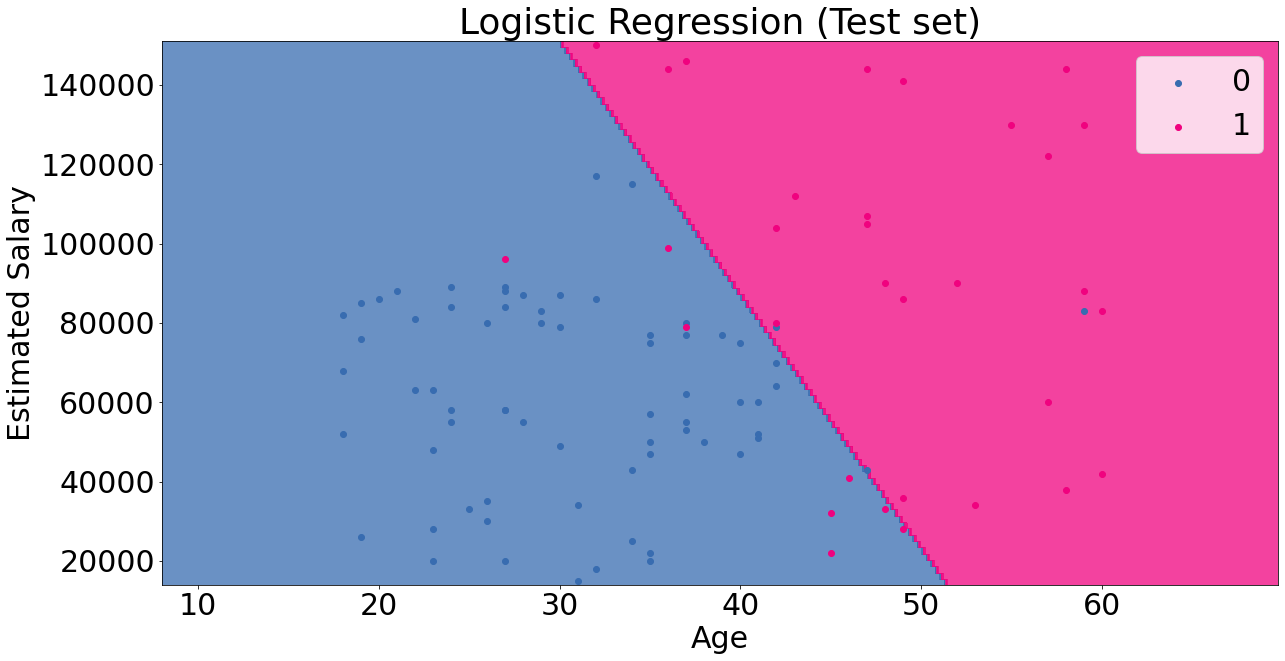

In [29]:
#1. reverse the standard scaler on the X_test
X_set, y_set = sc.inverse_transform(X_test), y_test

#2. Generate decision surface boundaries
min1, max1 = X_set[:, 0].min() - 10, X_set[:, 0].max() + 10 # for Age
min2, max2 = X_set[:, 1].min() - 1000, X_set[:, 1].max() + 1000 # for salary 

#3. Set coordinates scale accuracy
x_scale ,y_scale = np.arange(min1, max1, 0.25), np.arange(min2, max2, 0.25)

#4. Convert into vector 
X1, X2 = np.meshgrid(x_scale, y_scale)

#5. Flatten X1 and X2 and return the output as a numpy array
X_flatten = np.array([X1.ravel(), X2.ravel()])

#6. Transfor the results into it's original form before scaling
X_transformed = sc.transform(X_flatten.T)

#7. Generate the prediction and reshape it to the X to have the same shape
Z_pred = classifier.predict(X_transformed).reshape(X1.shape)

#8. set the plot size
plt.figure(figsize=(20,10))

#9. plot the contour function
plt.contourf(X1, X2, Z_pred,
             alpha = 0.75, cmap = ListedColormap(('#386cb0', '#f0027f')))


#10. setting the axes limit
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

#11. plot the points scatter plot ( [salary, age] vs. predicted classification based on training set)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('#386cb0', '#f0027f'))(i), label = j)
    
#12. plot labels and adjustments
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Conclusion

This code template could be done on any machine learning classification algorithms as long as you get the idea behind the different functions that have been used. 

Finally, I hope my post helped and looking forward to any constructed comments. 
